In [1]:
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"

In [2]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!wget -q https://repo.anaconda.com/archive/Anaconda2-2019.03-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!mv Miniconda3-latest-Linux-x86_64.sh $PROJECT_FOLDER/
!bash $PROJECT_FOLDER/Miniconda3-latest-Linux-x86_64.sh -b -f -p $PROJECT_FOLDER/miniconda3

--2019-12-06 11:17:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68,46M  11,2MB/s    in 6,1s    

2019-12-06 11:17:36 (11,2 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.

In [4]:
import os 
os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH']

In [4]:
!cd $PROJECT_FOLDER && git clone https://github.com/rwightman/posenet-pytorch.git

fatal: destination path 'posenet-pytorch' already exists and is not an empty directory.


In [8]:
!cd $PROJECT_FOLDER && conda install -y -c pytorch pytorch cudatoolkit
!cd $PROJECT_FOLDER && pip install requests opencv-python==3.4.5.20

Solving environment: done

## Package Plan ##

  environment location: /data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3

  added / updated specs:
    - cudatoolkit
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2019.11.27 |                0         132 KB
    certifi-2019.11.28         |           py37_0         156 KB
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    intel-openmp-2019.4        |              243         729 KB
    libgfortran-ng-7.3.0       |       hdf63c60_0        1006 KB
    mkl-2019.4                 |              243       131.2 MB
    mkl-service-2.3.0          |   py37he904b0f_0         218 KB
    mkl_fft-1.0.15             |   py37ha843d7b_0         172 KB
    mkl_random-1.1.0           |   py37hd6b4f25_0         321 KB
    ninja

In [5]:
!cd $PROJECT_FOLDER/posenet-pytorch && python image_demo.py --model 101 --image_dir ../images --output_dir ./output

/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:135: UserWarning: 
    Found GPU2 Quadro K600 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))

Results for image: ../images/demo_im.jpg
Pose #0, score = 0.844003
Keypoint nose, score = 0.995990, coord = [215.95751021 236.74689641]
Keypoint leftEye, score = 0.996715, coord = [210.44977051 241.39597739]
Keypoint rightEye, score = 0.988816, coord = [210.30457964 231.35542199]
Keypoint leftEar, score = 0.781620, coord = [213.81333296 249.25195481]
Keypoint rightEar, score = 0.941664, coord = [214.64656971 222.46668971]
Keypoint leftShoulder, score = 0.998046, coord = [246.1690101  258.84286162]
Keypoint rightShoulder, score = 0.996630, coord = [245.84217031 209.2468369 ]
Keypoint leftElbow, score = 0.9650

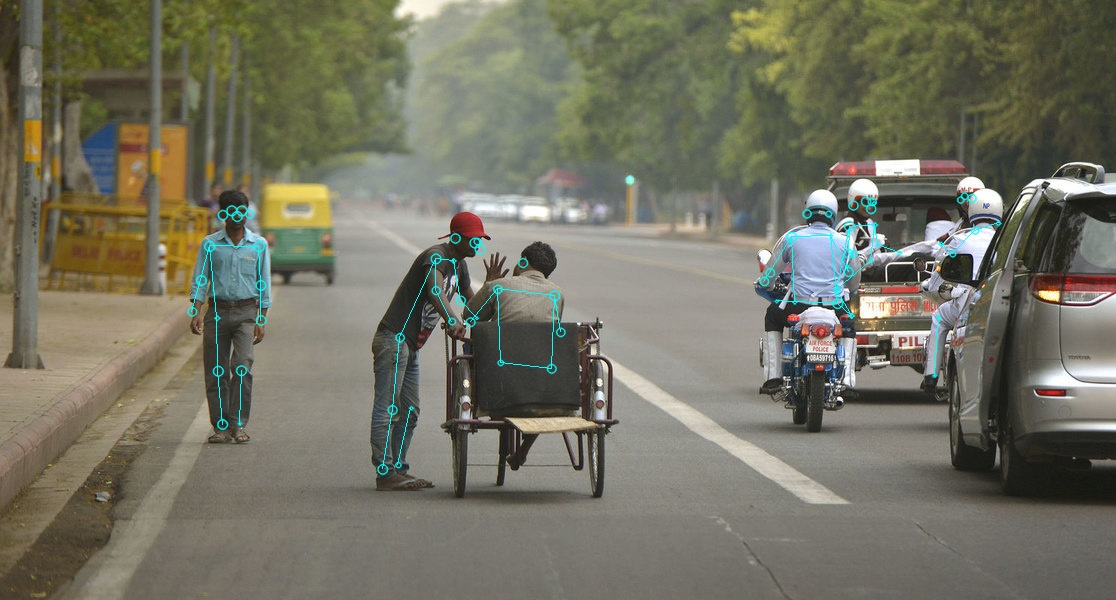

In [2]:
from IPython.display import Image
Image("../posenet-pytorch/output/demo_im.jpg")

# Analyse videos

In [2]:
#if everything is correctly installed...
import os
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
os.environ['PATH'] = PROJECT_FOLDER+"/miniconda3/bin:" + os.environ['PATH']

In [3]:
from os import listdir
from os.path import isfile, isdir, join

ACTION_LABEL_SET = ["A001","A002","A003","A004","A005","A006","A007","A008","A009","A010"]


PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
dataset_folder = "/data/datasets/NTURGBD"
video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi"

setupFolders = [f for f in listdir(dataset_folder) if isdir(join(dataset_folder, f)) and f[:13]=="nturgbd_rgb_s"]
print(setupFolders)
fileNames = []
for folder in setupFolders:
     fileNames.append([f for f in listdir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
                       if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
                       and any(label in f for label in ACTION_LABEL_SET)])
        
fileNames = sum(fileNames, []) #making it in 1-row
print(len(fileNames)) 

['nturgbd_rgb_s003', 'nturgbd_rgb_s008', 'nturgbd_rgb_s009', 'nturgbd_rgb_s005', 'nturgbd_rgb_s013', 'nturgbd_rgb_s001', 'nturgbd_rgb_s007', 'nturgbd_rgb_s015', 'nturgbd_rgb_s002', 'nturgbd_rgb_s004', 'nturgbd_rgb_s006', 'nturgbd_rgb_s010', 'nturgbd_rgb_s016', 'nturgbd_rgb_s017', 'nturgbd_rgb_s012', 'nturgbd_rgb_s011', 'nturgbd_rgb_s014']
9480


In [5]:
def extractFrames(file_name):
    setup, camera, performer, replication, action = parse.parse(video_name_format, file_name)
    filePath = join(dataset_folder,"nturgbd_rgb_s{:03d}".format(setup),"nturgb+d_rgb/",file_name)
    
#     video_folder_name = PROJECT_FOLDER+"/frames/"+file_name[:-4] #removing the .avi extension
#     try:
#         os.mkdir(video_folder_name)
#     except:
#         print("video folder exists already")
    
    # Opens the Video file
    video = cv2.VideoCapture(filePath)

    fps = round(video.get(cv2.CAP_PROP_FPS))
    length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print("Original FPS: {}".format(int(fps)))
    print("Requested FPS: {}".format(int(REQUESTED_FRAMES_PER_SECONDS)))
    print("length: {} width: {} height: {}".format(length, width, height))
    frame_ratio_to_keep = max(round(fps/REQUESTED_FRAMES_PER_SECONDS),1)

    print("pick 1 frame every {}".format(int(frame_ratio_to_keep)))

    !rm temp/* # cleaning temp
    i = -1
    while(video.isOpened()):
        i+=1
        ret, frame = video.read()
        if(i%frame_ratio_to_keep!=0):
            # print("DISCARDED")
            continue
        # print("PASED")
        if ret == False:
            # print("FINISHED")
            break
        
        cv2.imwrite("./temp/frame{:04d}.jpg".format(i),frame)

    video.release()
    cv2.destroyAllWindows()

In [6]:
REQUESTED_FRAMES_PER_SECONDS = 30

import cv2
import parse

try:
    os.mkdir("temp")
except:
    pass

for i, file_name in enumerate(fileNames[:1]):
    print("{}/{} - {}".format(i, len(fileNames), file_name))
    
    video_folder_name = PROJECT_FOLDER+"/inputData/"+file_name[:-4] #removing the .avi extension
    try:
        os.mkdir(video_folder_name)
    except:
        print("video folder exists already")
    
    extractFrames(file_name)
    
    
print("DONE!")

0/9480 - S003C002P015R001A007_rgb.avi
video folder exists already
Original FPS: 30
Requested FPS: 30
length: 62 width: 1920 height: 1080
pick 1 frame every 1
DONE!


In [7]:
!ls temp/

frame0000.jpg  frame0013.jpg  frame0026.jpg  frame0039.jpg  frame0052.jpg
frame0001.jpg  frame0014.jpg  frame0027.jpg  frame0040.jpg  frame0053.jpg
frame0002.jpg  frame0015.jpg  frame0028.jpg  frame0041.jpg  frame0054.jpg
frame0003.jpg  frame0016.jpg  frame0029.jpg  frame0042.jpg  frame0055.jpg
frame0004.jpg  frame0017.jpg  frame0030.jpg  frame0043.jpg  frame0056.jpg
frame0005.jpg  frame0018.jpg  frame0031.jpg  frame0044.jpg  frame0057.jpg
frame0006.jpg  frame0019.jpg  frame0032.jpg  frame0045.jpg  frame0058.jpg
frame0007.jpg  frame0020.jpg  frame0033.jpg  frame0046.jpg  frame0059.jpg
frame0008.jpg  frame0021.jpg  frame0034.jpg  frame0047.jpg  frame0060.jpg
frame0009.jpg  frame0022.jpg  frame0035.jpg  frame0048.jpg  frame0061.jpg
frame0010.jpg  frame0023.jpg  frame0036.jpg  frame0049.jpg
frame0011.jpg  frame0024.jpg  frame0037.jpg  frame0050.jpg
frame0012.jpg  frame0025.jpg  frame0038.jpg  frame0051.jpg


In [51]:
any(ACTION_LABEL_SET in fileNames[0])

TypeError: 'in <string>' requires string as left operand, not list

In [40]:
join(dataset_folder,setupFolders[1],"nturgb+d_rgb/")

'/data/datasets/NTURGBD/nturgbd_rgb_s008/nturgb+d_rgb/'

In [32]:
!echo $PATH

/data/students_home/amoscatelli/Desktop/actionAnalysis/miniconda3/bin:/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin


In [11]:
!ls /data/datasets/NTURGBD/nturgbd_rgb_s001/nturgb+d_rgb/

S001C001P001R001A001_rgb.avi  S001C002P005R001A001_rgb.avi
S001C001P001R001A002_rgb.avi  S001C002P005R001A002_rgb.avi
S001C001P001R001A003_rgb.avi  S001C002P005R001A003_rgb.avi
S001C001P001R001A004_rgb.avi  S001C002P005R001A004_rgb.avi
S001C001P001R001A005_rgb.avi  S001C002P005R001A005_rgb.avi
S001C001P001R001A006_rgb.avi  S001C002P005R001A006_rgb.avi
S001C001P001R001A007_rgb.avi  S001C002P005R001A007_rgb.avi
S001C001P001R001A008_rgb.avi  S001C002P005R001A008_rgb.avi
S001C001P001R001A009_rgb.avi  S001C002P005R001A009_rgb.avi
S001C001P001R001A010_rgb.avi  S001C002P005R001A010_rgb.avi
S001C001P001R001A011_rgb.avi  S001C002P005R001A011_rgb.avi
S001C001P001R001A012_rgb.avi  S001C002P005R001A012_rgb.avi
S001C001P001R001A013_rgb.avi  S001C002P005R001A013_rgb.avi
S001C001P001R001A014_rgb.avi  S001C002P005R001A014_rgb.avi
S001C001P001R001A015_rgb.avi  S001C002P005R001A015_rgb.avi
S001C001P001R001A016_rgb.avi  S001C002P005R001A016_rgb.avi
S001C001P001R001A017_rgb.avi  S001C002P005R001A017_rgb.a